In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import binarize
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn import metrics

/Users/terry/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [50]:
class RubygemLearner(object):
    def __init__(self, fn):
        with open(fn) as f:
            data = json.load(f)
        d = data["data"]
        self.spec = data["spec"]
        self.df = pd.io.json.json_normalize(d)
        self._rename_columns()
        self.df = self.df[self.df["avg_nloc"]<20]
            
    def exclude_unwanted_features(self):
        exclude = []#'nloc',] #+ reek_columns + lizard_columns #+ reek_columns
        features = [k for k, v in d[0]['stat'].items() if k not in exclude]
        
    def remove_too_small_changes(self):
        try:
            df = df.groupby('name').filter(lambda x: x['delta_nloc'].sum() >2000)
        except:
            pass
    
    def summary(self):
        print(spec)
        print('nb_records:', len(self.df))
        print("abandoned:", (self.df['label'] != 'maintained').sum())
        
    def feature_evaluation(self):
        X = df[features]
        y = (df.label == 'maintained').values.astype(int)
        from sklearn.feature_selection import SelectKBest
        from sklearn.feature_selection import chi2,f_classif, mutual_info_classif
        X_new = SelectKBest(f_classif, k=10).fit(X, y)
        return np.array([X_new.scores_, features]).T
        
    def _rename_columns(self):
        old_new_cols = {}
        for name in self.df.columns:
            if name.startswith('stat'):
                old_new_cols[name] = name.split('.')[1]
        self.df.rename(columns=old_new_cols, inplace=True)
        
    def my_train_test_split(self, test_size=0.3):
        Xgems = self.df[["name"]].drop_duplicates()
        X_train_gems, X_test_gems = train_test_split(Xgems, test_size=test_size)
        X_train = self.df[self.df['name'].isin(X_train_gems['name'])]
        y_train = (X_train.label == 'maintained').values.astype(int)
        X_train = X_train[features]
        dftest = self.df[self.df['name'].isin(X_test_gems['name'])]

        return X_train, y_train, dftest



df.rename(columns=old_new_cols, inplace=True)

In [49]:
import json

fn = 'RubygemDigger--Steps--GenerateJsonForLastVersions--2.data.json'
fn = 'RubygemDigger--Steps--GenerateJsonForAllVersions--2.data.json.all.json'

learner = RubygemLearner(fn)
learner.summary()
print(learner.feature_evaluation())

{'version': 2, 'description': 'less months', 'min_number_of_gems': 12, 'min_months': 10, 'min_nloc': 2000, 'min_months_good': 20, 'history_months': 10, 'stopped_time_point': '2015-01-01 00:00:00 UTC', 'ignored_months_for_good': 10}
nb_records: 9968
abandoned: 3819
[['11.961183389288173' 'nloc']
 ['3.75560467766501' 'avg_ccn']
 ['0.6448856907157405' 'avg_nloc']
 ['0.039490378879491146' 'avg_token']
 ['37.27119007124272' 'fun_count']
 ['17.213127194413996' 'warning_count']
 ['9.15856335988168' 'fun_rate']
 ['3.6478394417823767' 'nloc_rate']
 ['46.02250622697096' 'style_']
 ['83.92041889635281' 'performance_']
 ['20.146286120430833' 'security_']
 ['153.1749586354917' 'lint_']
 ['5.809438409861999' 'lint_duplicate']
 ['26.271959944849' 'metrics_']
 ['26.7601405258994' 'metrics_abcsize']
 ['3.660312428657418' 'metrics_blocklength']
 ['0.41187401076284047' 'metrics_blocknesting']
 ['79.66042872761909' 'metrics_classlength']
 ['55.36896104310767' 'metrics_cyclomaticcomplexity']
 ['0.430014979

In [4]:
df = pd.io.json.json_normalize(d)

old_new_cols = {}
for name in df.columns:
    if name.startswith('stat'):
        old_new_cols[name] = name.split('.')[1]

df.rename(columns=old_new_cols, inplace=True)
df = df[df["avg_nloc"]<20]
df.head()

,label,name,Attribute,BooleanParameter,ClassVariable,ControlParameter,DataClump,DuplicateMethodCall,FeatureEnvy,InstanceVariableAssumption,...,metrics_perceivedcomplexity,nloc,nloc_rate,performance_,reek_total,security_,style_,total,warning_count,version
0,abandoned,actionwebservice,4.497751,0.187406,0.0,1.686657,1.311844,35.044978,7.683658,8.245877,...,1.124438,5336,0.24,0.562219,163.793103,0.0,57.721139,0.749625,6.371814,1.0.0
1,abandoned,actionwebservice,4.313444,0.359454,0.0,1.797268,1.258088,37.203451,7.548526,7.907980,...,1.258088,5564,0.24,0.539180,165.168943,0.0,56.254493,1.437815,6.290439,1.1.0
2,abandoned,actionwebservice,4.299534,0.358295,0.0,1.791473,1.254031,37.620924,7.524185,7.882479,...,1.254031,5582,0.24,0.537442,165.711215,0.0,59.118595,0.179147,6.270154,1.1.2
3,abandoned,actionwebservice,4.299534,0.358295,0.0,1.791473,1.254031,37.620924,7.524185,7.882479,...,1.254031,5582,0.24,0.537442,165.711215,0.0,59.118595,0.179147,6.270154,1.1.4
4,abandoned,actionwebservice,4.299534,0.358295,0.0,1.791473,1.254031,37.620924,7.524185,7.882479,...,1.254031,5582,0.24,0.537442,165.711215,0.0,59.118595,0.179147,6.270154,1.1.6


In [5]:
(df['label'] != 'maintained').sum()

3819

In [6]:
reek_columns =[
    'reek_total',
 'Attribute',
 'BooleanParameter',
 'ClassVariable',
 'ControlParameter',
 'DataClump',
 'DuplicateMethodCall',
 'FeatureEnvy',
 'InstanceVariableAssumption',
 'IrresponsibleModule',
 'LongParameterList',
 'LongYieldList',
 'ManualDispatch',
 'ModuleInitialize',
 'NestedIterators',
 'NilCheck',
 'PrimaDonnaMethod',
 'RepeatedConditional',
 'SubclassedFromCoreClass',
 'TooManyConstants',
 'TooManyInstanceVariables',
 'TooManyMethods',
 'TooManyStatements',
 'UncommunicativeMethodName',
 'UncommunicativeModuleName',
 'UncommunicativeParameterName',
 'UncommunicativeVariableName',
 'UnusedParameters',
 'UtilityFunction',
 'delta_Attribute',
 'delta_BooleanParameter',
 'delta_ClassVariable',
 'delta_ControlParameter',
 'delta_DataClump',
 'delta_DuplicateMethodCall',
 'delta_FeatureEnvy',
 'delta_InstanceVariableAssumption',
 'delta_IrresponsibleModule',
 'delta_LongParameterList',
 'delta_LongYieldList',
 'delta_ManualDispatch',
 'delta_ModuleInitialize',
 'delta_NestedIterators',
 'delta_NilCheck',
 'delta_PrimaDonnaMethod',
 'delta_RepeatedConditional',
 'delta_SubclassedFromCoreClass',
 'delta_TooManyConstants',
 'delta_TooManyInstanceVariables',
 'delta_TooManyMethods',
 'delta_TooManyStatements',
 'delta_UncommunicativeMethodName',
 'delta_UncommunicativeModuleName',
 'delta_UncommunicativeParameterName',
 'delta_UncommunicativeVariableName',
 'delta_UnusedParameters',
 'delta_UtilityFunction',
 'delta_reek_total']
lizard_columns = [
 'avg_ccn',
 'avg_nloc',
 'avg_token',
 'fun_count',
 'fun_rate',
 'nloc_rate',
 'warning_count',
 'delta_avg_ccn',
 'delta_avg_nloc',
 'delta_avg_token',
 'delta_fun_count',
 'delta_fun_rate',
 'delta_warning_count',

]

rubocop_columns = [
 'delta_lint_',
 'delta_lint_duplicate',
 'delta_metrics_abcsize',
 'delta_metrics_blocklength',
 'delta_metrics_blocknesting',
 'delta_metrics_classlength',
 'delta_metrics_cyclomaticcomplexity',
 'delta_metrics_linelength',
 'delta_metrics_methodlength',
 'delta_metrics_modulelength',
 'delta_metrics_parameterlists',
 'delta_metrics_perceivedcomplexity',
 'delta_nloc',
 'delta_nloc_rate',
 'delta_style_',
 'delta_total',
        'delta_performance_',
    'delta_security_',
    'delta_metrics_',
 'lint_',
 'lint_duplicate',
 'metrics_abcsize',
 'metrics_blocklength',
 'metrics_blocknesting',
 'metrics_classlength',
 'metrics_cyclomaticcomplexity',
 'metrics_linelength',
 'metrics_methodlength',
 'metrics_modulelength',
 'metrics_parameterlists',
 'metrics_perceivedcomplexity',
 'style_',
    'performance_',
    'security_',
    'metrics_',
 'total',
 ]

# Basic building blocks

In [12]:
def label_counts_summary(data, label='unknow'):
    N = len(data)
    N_ones = data.sum()
    print('''
label: {}
nb. of observations: {}
nb. of ones (good gems): {}
frequency: {:.3f}
    '''.format(label, N, N_ones, 1.0 * N_ones / N))

In [13]:
label_counts_summary(y, label='Full set')

# split full dataset into 70% training and 30% test data
# test data is used only to evalute the model's prediction performance
X_train, y_train, dftest = my_train_test_split(df, test_size=0.3)

label_counts_summary(y_train, label='Training set')
#label_counts_summary(dftest, label='Test set')


label: Full set
nb. of observations: 7265
nb. of ones (good gems): 4579
frequency: 0.630
    

label: Training set
nb. of observations: 5091
nb. of ones (good gems): 3213
frequency: 0.631
    


In [14]:
def train(model, X_train, y_train):
    estimator = model
    X_train = dftrain[features]
    y_train = (dftrain.label == 'maintained').values.astype(int)
    estimator.fit(X_train, y_train)
    return estimator

In [15]:
def predict_sequence(estimator, df, name, label, threshold=0.5):
    X = df[df['name']==name][df['label']==label][features]
    y_pred = estimator.predict(X)
    return 0 if np.mean(y_pred) < threshold else 1

def test_model(model, dftest):
    estimator = model
    testers = dftest[["name", "label"]].drop_duplicates()
    y_test = (testers.label == 'maintained').values.astype(int)
    y_pred = [predict_sequence(estimator, dftest, t[0], t[1]) for t in testers.values]
    #print(y_pred)
    #print(y_test)
    #print(metrics.classification_report(y_test, y_pred))
    return metrics.accuracy_score(y_test, y_pred)

def train_and_test(model, df):
    accuracies = []
    for i in range(5):
        X_train, y_train, test = my_train_test_split(df, test_size=0.3)
        model.fit(X_train, y_train)
        accuracies.append(test_model(model, test))
    return np.mean(accuracies)
    

# Classify using LogisticRegression

In [16]:
model = LogisticRegression()
print(train_and_test(model, df))


/Users/terry/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


0.6116331746


# Classify using kNN

/Users/terry/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


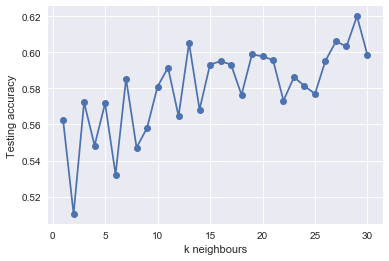

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

nb_range = np.arange(1, 31)
a_scores = []

for nb in nb_range:
    model = KNeighborsClassifier(n_neighbors=nb)
    a_scores.append(train_and_test(model, df))
    
plt.plot(nb_range, a_scores, 'o-')
plt.ylabel('Testing accuracy')
plt.xlabel('k neighbours')

In [18]:
from sklearn.grid_search import GridSearchCV

/Users/terry/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [19]:
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights=weight_options)

knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)


# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.5832071576049552
{'n_neighbors': 28, 'weights': 'distance'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=28, p=2,
           weights='distance')


# Ensemble

In [20]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [21]:
from sklearn.ensemble import BaggingClassifier
print(train_and_test(BaggingClassifier(grid.best_estimator_, max_samples=0.5, max_features=0.5), df))

/Users/terry/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/Users/terry/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/Users/terry/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/Users/terry/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/Users/terry/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


0.643455735282


In [22]:
print(train_and_test(BaggingClassifier(DecisionTreeRegressor()), df))

/Users/terry/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/Users/terry/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:146: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  proba[i, predictions[i]] += 1
/Users/terry/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/Users/terry/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:146: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  proba[i, predictions[i]] += 1
/Users/terry/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  

0.589953025127


In [23]:
print(train_and_test(BaggingClassifier(LogisticRegression()), df))

/Users/terry/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/Users/terry/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/Users/terry/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/Users/terry/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/Users/terry/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


0.599925549063


In [24]:
print(train_and_test(BaggingClassifier(KNeighborsClassifier(n_neighbors=15)), df))

/Users/terry/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/Users/terry/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/Users/terry/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/Users/terry/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/Users/terry/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


0.601605256362


In [25]:
from sklearn.ensemble import RandomForestClassifier
print(train_and_test(RandomForestClassifier(n_estimators=20), df))

/Users/terry/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/Users/terry/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/Users/terry/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/Users/terry/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/Users/terry/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


0.6329392747


In [26]:
from sklearn.ensemble import AdaBoostClassifier
print(train_and_test(AdaBoostClassifier(n_estimators=100), df))

/Users/terry/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/Users/terry/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/Users/terry/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/Users/terry/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/Users/terry/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


0.609544935276


In [27]:
from sklearn.ensemble import GradientBoostingClassifier
print(train_and_test( GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=4, random_state=0), df))

/Users/terry/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


0.586939843069


In [28]:
from sklearn.svm import LinearSVC
model = LinearSVC(loss='l2', penalty="l2",dual=False, tol=1e-4)
print(train_and_test(model, df))

/Users/terry/anaconda3/lib/python3.6/site-packages/sklearn/svm/classes.py:199: DeprecationWarning: loss='l2' has been deprecated in favor of loss='squared_hinge' as of 0.16. Backward compatibility for the loss='l2' will be removed in 1.0
  DeprecationWarning)
/Users/terry/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


0.627486760632


In [38]:
model.decision_function

<bound method LinearClassifierMixin.decision_function of LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)>

In [29]:
from sklearn.neural_network import MLPClassifier
print(train_and_test(MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(15,), random_state=1), df))

/Users/terry/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


0.615394273131
